In [28]:
import pandas as pd
import numpy as np

df = pd.io.parsers.read_csv('https://raw.githubusercontent.com/rasbt/pattern_classification/master/data/wine_data.csv',
                            header=None, usecols=[0,1,2])

df.columns = ['Class label', 'Alcohol', 'Malic acid']

df.head(1000)

,Class label,Alcohol,Malic acid
0,1,14.23,1.71
1,1,13.20,1.78
2,1,13.16,2.36
3,1,14.37,1.95
4,1,13.24,2.59
5,1,14.20,1.76
6,1,14.39,1.87
7,1,14.06,2.15
8,1,14.83,1.64
9,1,13.86,1.35


In [5]:
from sklearn import preprocessing

std_scale = preprocessing.StandardScaler().fit(df[['Alcohol', 'Malic acid']])

df_std = std_scale.transform(df[['Alcohol', 'Malic acid']])
df_std[:5]

array([[ 1.51861254, -0.5622498 ],
       [ 0.24628963, -0.49941338],
       [ 0.19687903,  0.02123125],
       [ 1.69154964, -0.34681064],
       [ 0.29570023,  0.22769377]])

In [6]:
minmax_scale = preprocessing.MinMaxScaler().fit(df[['Alcohol', 'Malic acid']])
df_minmax = minmax_scale.transform(df[['Alcohol', 'Malic acid']])
df_minmax[:3]

array([[0.84210526, 0.1916996 ],
       [0.57105263, 0.2055336 ],
       [0.56052632, 0.3201581 ]])

In [16]:
print('Mean after standardization:\n \
Alcohol = {:.2f}, Malic acid = {:.2f}'
        .format(df_std[:,0].mean(), df_std[:,1].mean()))
print('\nStandard deviation after standardization:\n \
Alcohol = {:.2f}, Malic acid = {:.2f}'
        .format(df_std[:,0].std(), df_std[:,1].std()))

Mean after standardization:
 Alcohol = -0.00, Malic acid = -0.00

Standard deviation after standardization:
 Alcohol = 1.00, Malic acid = 1.00


In [17]:
print('Min-value after min-max scaling:\nAlcohol={:.2f}, Malic acid={:.2f}'
.format(df_minmax[:,0].min(), df_minmax[:,1].min()))
print('\nMax-value after min-max scaling:\nAlcohol={:.2f}, Malic acid={:.2f}'
.format(df_minmax[:,0].max(), df_minmax[:,1].max()))

Min-value after min-max scaling:
Alcohol=0.00, Malic acid=0.00

Max-value after min-max scaling:
Alcohol=1.00, Malic acid=1.00


In [18]:
%matplotlib inline

In [19]:
from matplotlib import pyplot as plt

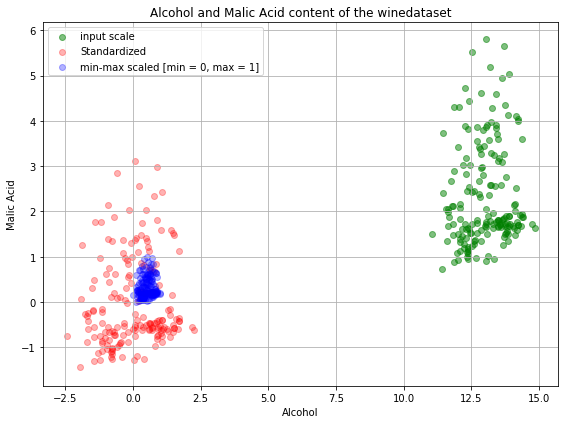

In [20]:
def plot():
    plt.figure(figsize = (8, 6))
    
    plt.scatter(df['Alcohol'], df['Malic acid'],
               color = 'green', label = 'input scale', alpha = 0.5)
    
    plt.scatter(df_std[:, 0], df_std[:, 1], color = 'red',
               label = 'Standardized', alpha = 0.3)
    
    plt.scatter(df_minmax[:,0], df_minmax[:, 1],
               color = 'blue', label = 'min-max scaled [min = 0, max = 1]', alpha = 0.3)
    
    plt.title('Alcohol and Malic Acid content of the winedataset')
    plt.xlabel('Alcohol')
    plt.ylabel('Malic Acid')
    plt.legend(loc = 'upper left')
    plt.grid()
    
    plt.tight_layout()

plot()
plt.show()

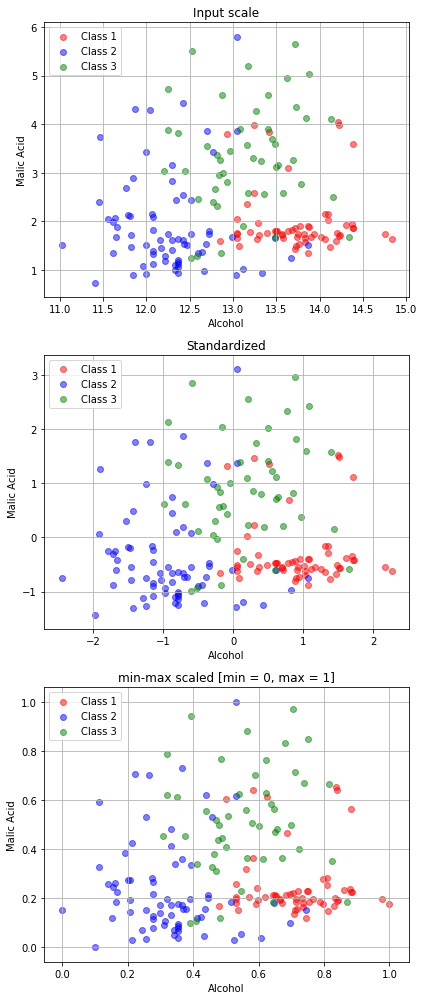

In [30]:
fig, ax = plt.subplots(3, figsize = (6, 14))

for a,d,l in zip(range(len(ax)),
                (df[['Alcohol', 'Malic acid']].values, df_std, df_minmax),
                ('Input scale', 'Standardized', 'min-max scaled [min = 0, max = 1]')):
    
    for i, c in zip(range(1, 4), ('red', 'blue', 'green')):
        ax[a].scatter(d[df['Class label'].values == i, 0],
                     d[df['Class label'].values == i, 1],
                     alpha = 0.5,
                     color = c,
                     label = 'Class %s' %i)
        
    ax[a].set_title(l)
    ax[a].set_xlabel('Alcohol')
    ax[a].set_ylabel('Malic Acid')
    ax[a].legend(loc = 'upper left')
    ax[a].grid()
    
plt.tight_layout()

plt.show()